This class represents the naive approach with Logistic Regression, SVM and SGD. It is also used to generate the wordcloud.

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import linear_model
from tensorflow import keras

seed = 43
%matplotlib inline

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

In [3]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
del df['qid']
df.head()

,question_text,target
0,How did Quebec nationalists see their province...,0
1,"Do you have an adopted dog, how would you enco...",0
2,Why does velocity affect time? Does velocity a...,0
3,How did Otto von Guericke used the Magdeburg h...,0
4,Can I convert montra helicon D to a mountain b...,0


In [5]:
df.shape

(1306122, 2)

In [6]:
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [7]:
80810/(1225312+80810)

0.06187017751787352

In [8]:
labels = df['target'].values
features = df.drop('target', axis = 1).values

In [9]:
features_list = features.tolist()

In [10]:
sentences = [item for sublist in features_list for item in sublist]

In [11]:
superstring = ' '.join(sentences)

In [12]:
from PIL import Image
x = np.array(Image.open("quora.png"))

# WordCloud

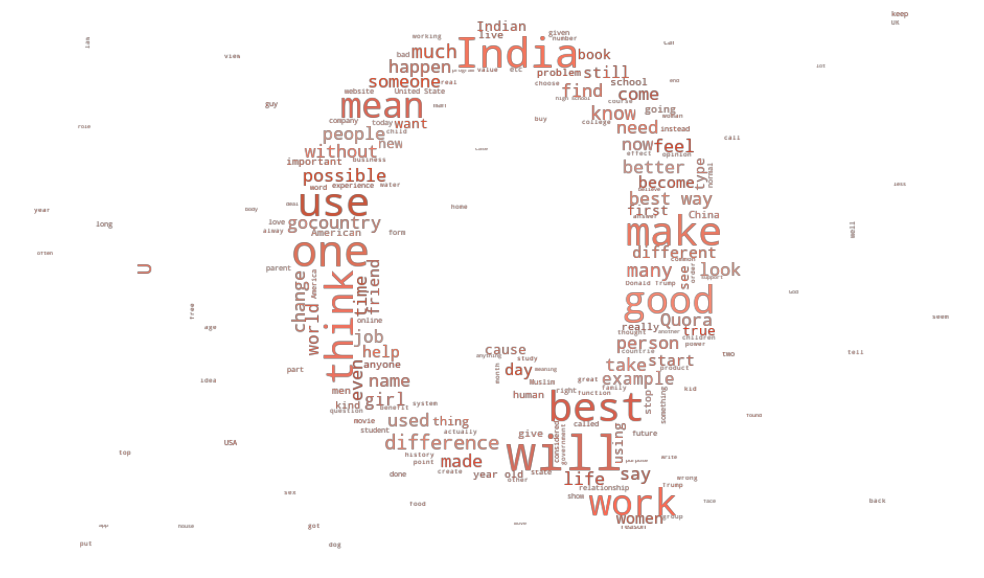

In [13]:
from wordcloud import WordCloud
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    c1 = random.randint(8,11)
    c2 = random.randint(50,100)
    c3 = random.randint(50,70)
    st = "hsl(" + str(c1) + ", " + str(c2) + "%, " + str(c3) + "%)"
#     print(st)
    return st
#     print("hsl(0, 0%%, %d%%)" % random.randint(60, 100))
#     return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wordcloud = WordCloud(width=2000, height=1000, background_color=None, mode="RGBA", mask = x).generate(superstring)
default_colors = wordcloud.to_array()

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")

# plt.imshow(default_colors, interpolation="bilinear")

plt.axis("off")
plt.show()

# Creating the Word Vector

In [14]:
mydict={}
count = 0
i = 0
for itemL in sentences:
    count += 1
    for item in itemL.split():
        if(i>0 and item in mydict):
            continue
        else:    
           i = i+1
           mydict[item] = i

count = 0
k = [[] for _ in range(len(sentences))]
for i in sentences:
    for item in i.split():
        k[count].append(mydict[item])
    count += 1

In [15]:
sentences[100]

"What do physicists, mathematicians, computer scientists and philosophers think of David Deutsch's 'Constructor Theory'?"

In [16]:
k[100]

[124, 73, 722, 723, 431, 724, 26, 725, 183, 181, 726, 727, 728, 729]

In [17]:
X = k
y = labels

In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state = seed)

In [19]:
train_data[0]

[124, 21, 77, 16, 101, 676, 88192, 24, 200168, 3202, 4149]

In [20]:
longest = 0
for item in sentences:
    i = 0
    for boh in item.split():
        i += 1
    if i > longest:
        longest = i
longest

134

Output is 134, being the title with the most words

In [21]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=128)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=128)

In [22]:
print(train_data[0])

[   124     21     77     16    101    676  88192     24 200168   3202
   4149      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0]


In [23]:
train_data, train_labels = RandomUnderSampler(random_state = seed).fit_sample(train_data, train_labels)
        
train_data, train_labels = shuffle(train_data, train_labels, random_state=seed)

In [24]:
len(train_data)

129426

In [43]:
train_labels.mean()

0.5

# Logistic Regression

In [27]:
final_model = LogisticRegression(C=0.05)
final_model.fit(train_data, train_labels)
print ("Final Accuracy: %s" 
       % accuracy_score(train_labels, final_model.predict(train_data)))
print(f1_score(test_labels, final_model.predict(test_data)))

C:\Users\towis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Final Accuracy: 0.6073818243629564
0.1727216207021948


In [28]:
matrix = metrics.confusion_matrix(final_model.predict(test_data), test_labels)
matrix

array([[183340,   8735],
       [ 61788,   7362]], dtype=int64)

# Support Vector Machine

In [29]:
clf = SVC(random_state=seed, verbose=0)
clf.fit(train_data[:20000], train_labels[:20000])
tscore = clf.score(train_data[:20000], train_labels[:20000])
vscore = clf.score(test_data[:20000], test_labels[:20000])
print(f"tscore={tscore} vscore={vscore}")

C:\Users\towis\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


tscore=1.0 vscore=0.9385


In [30]:
print(confusion_matrix(clf.predict(test_data[:20000]), test_labels[:20000])) 

[[18770  1230]
 [    0     0]]


In [31]:
print(f1_score(test_labels[:20000], clf.predict(test_data[:20000])))

0.0


C:\Users\towis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print(test_labels[:100000])

[0 0 0 ... 0 0 0]


# Stochastic Gradient Descent

In [33]:
clf = linear_model.SGDClassifier(random_state=seed, verbose=4)
clf.fit(train_data, train_labels)
tscore = clf.score(train_data, train_labels)
vscore = clf.score(test_data, test_labels)
print(f"tscore={tscore} vscore={vscore}")

C:\Users\towis\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-- Epoch 1
Norm: 132328.09, NNZs: 57, Bias: -608.669174, T: 129426, Avg. loss: 4383061350.991087
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 84578.36, NNZs: 57, Bias: -691.798028, T: 258852, Avg. loss: 627947289.684212
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 48535.40, NNZs: 60, Bias: -735.340801, T: 388278, Avg. loss: 373130273.811931
Total training time: 0.18 seconds.
-- Epoch 4
Norm: 44481.06, NNZs: 60, Bias: -777.611445, T: 517704, Avg. loss: 262163299.243777
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 34593.84, NNZs: 60, Bias: -803.379684, T: 647130, Avg. loss: 202633597.115363
Total training time: 0.32 seconds.
tscore=0.5456245267566022 vscore=0.4386065652215523


In [34]:
print(confusion_matrix(clf.predict(test_data), test_labels)) 

[[103935   5457]
 [141193  10640]]


In [35]:
print(f1_score(test_labels, clf.predict(test_data)))

0.1267194664443518
